In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import *
from bayesian_utils import KF

In [2]:
true_trajectory, noisy_observations = generate_trajectory_linear()

In [3]:
kalman_filter = KF(A, Q, H, R)
state_estimates, cov_estimates = kalman_filter.filter(noisy_observations)
state_estimates_smoothed, cov_estimates_smoothed = kalman_filter.smoother(state_estimates, cov_estimates)

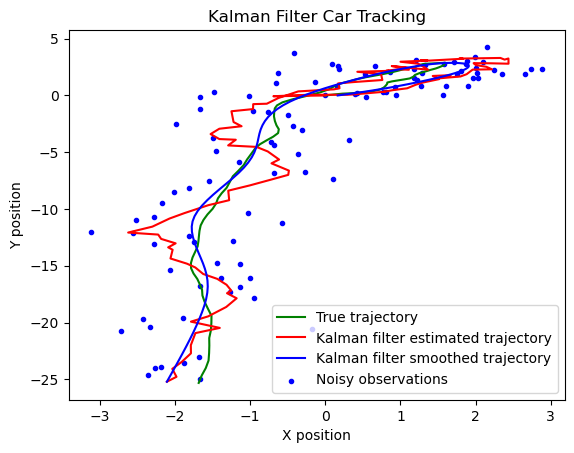

In [4]:
plt.plot(true_trajectory[:, 0], true_trajectory[:, 1], 'g-', label='True trajectory')
plt.plot(state_estimates[:, 0], state_estimates[:, 1], 'r-', label='Kalman filter estimated trajectory')
plt.plot(state_estimates_smoothed[:, 0], state_estimates_smoothed[:, 1], 'b-', label='Kalman filter smoothed trajectory')
plt.scatter(noisy_observations[:, 0], noisy_observations[:, 1], c='b', marker='.', label='Noisy observations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.title('Kalman Filter Car Tracking')
plt.show()